In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 50%  
## На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

1. create **table.html** with empty body
2. put '/html/body/div[2]/div/div[1]/div[1]/div/div[1]/div/div/table' from https://www.top500.org/statistics/perfdevel/
into the body of **table.html**

In [2]:
# page_df = pd.read_html('https://www.top500.org/statistics/perfdevel/')
page_df = pd.read_html('table.html')[0]
page_df['List'] = pd.to_datetime(page_df['List'])
page_df.head()

,List,Sum,#1,#500
0,1993-06-01,1128.57,59.7,0.42
1,1993-11-01,1493.35,124.0,0.47
2,1994-06-01,2317.01,143.4,0.84
3,1994-11-01,2732.24,170.0,1.16
4,1995-06-01,3927.00,170.0,1.96


<AxesSubplot:xlabel='year', ylabel='GFlop/s'>

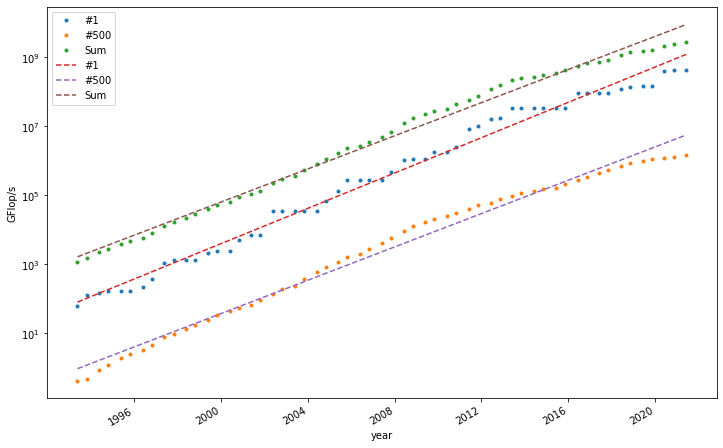

In [3]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
colors = ['blue', 'orange', 'red']
model = LinearRegression()
models = {}
predictions = {'List': page_df['List']}
for val in ['#1', '#500', 'Sum']:
    x = (page_df['List'] - page_df['List'][0]).dt.days.values.reshape(-1, 1)
    t = (page_df[val].values).reshape(-1, 1)
    model.fit(x, np.log(t))
    y = np.exp(model.predict(x))
    predictions[val] = y.flatten()
    models[val] = (model.coef_, model.intercept_)
    #     pd.to_timedelta(x.flatten(), unit='days') + page_df['List'][0])
predictions = pd.DataFrame(predictions)

page_df.plot('List', ['#1', '#500', 'Sum'], ax=ax, logy=True, style='.', xlabel='year', ylabel='GFlop/s')
predictions.plot('List', ['#1', '#500', 'Sum'], ax=ax, logy=True, style='--', xlabel='year', ylabel='GFlop/s')

In [4]:
k, b = models['#1']
x = (pd.Timestamp('2025-06-01') - page_df['List'][0]).days
print(f'in 2025 expected {np.exp(k * x + b)[0][0]:.2} Gflops')

in 2025 expected 1.3e+10 Gflops


Ответ:  
# На основе данных из https://www.top500.org/statistics/perfdevel/ в 2025г ожидается производительность top-1 суперкомпьютера **13 EFlop/s**

## 50%  
## оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

according to https://yearbook.enerdata.net/electricity/world-electricity-production-statistics.html total worldwide production of electricity in 2020 was a bit over **26907 TWh**.

In [5]:
TOTAL_POWER_SUPPLY = 2.6907e16
print(f'Suppose that total power supply in 2020 slightly exceeds {TOTAL_POWER_SUPPLY} Watts')

Suppose that total power supply in 2020 slightly exceeds 2.6907e+16 Watts


To predict consumption in 2020 we will use period from 2019 Nov to 2020 Nov  
Let's use these lists (2 periods from green500)  
https://www.top500.org/files/green500/green500_top_202006.xlsx  
https://www.top500.org/files/green500/green500_top_202011.xlsx  
We will consider constant values of power during each period

In [6]:
green_df_202006 = pd.read_excel('https://www.top500.org/files/green500/green500_top_202006.xlsx')
green_df_202011 = pd.read_excel('https://www.top500.org/files/green500/green500_top_202011.xlsx')
# green_df_202106 = pd.read_excel('https://www.top500.org/files/green500/green500_top_202106.xlsx')

In [7]:
days_Nov_Jun = (pd.Timestamp('2020-06-01') - pd.Timestamp('2019-11-01')).days
days_Jun_Nov = (pd.Timestamp('2020-11-01') - pd.Timestamp('2020-06-01')).days
print(f'from Nov to Jun {days_Nov_Jun} days\n'
      f'from Jun to Nov {days_Jun_Nov} days\n'
      f'sum = {days_Jun_Nov + days_Nov_Jun} days')

from Nov to Jun 213 days
from Jun to Nov 153 days
sum = 366 days


In [8]:
green_df = green_df_202011

In [9]:
green_df = green_df[['Rank', 'TOP500 Rank',
                     'Name', 'Country',
                     'Rmax [TFlop/s]', 'Rpeak [TFlop/s]',
                     'Power (kW)', 'Power Efficiency [GFlops/Watts]']]
green_df

,Rank,TOP500 Rank,Name,Country,Rmax [TFlop/s],Rpeak [TFlop/s],Power (kW),Power Efficiency [GFlops/Watts]
0,1,170,NVIDIA DGX SuperPOD,United States,2356.0000,2812.8000,89.94,26.195241
1,2,330,MN-3,Japan,1652.9000,3137.8700,65.39,26.039190
2,3,7,JUWELS Booster Module,Germany,44120.0000,70980.0000,1764.22,25.008219
3,4,146,Spartan2,France,2566.0000,3847.2200,105.76,24.262481
4,5,5,Selene,United States,63460.0000,79215.0000,2646.00,23.983371
...,...,...,...,...,...,...,...,...
495,496,204,Betty,United States,2133.0000,4406.8864,NaN,NaN
496,497,37,NaN,United Kingdom,7038.9300,8128.5120,NaN,NaN
497,498,419,Cumulus-Cascadelake,United Kingdom,1644.3600,2649.2900,NaN,NaN
498,499,124,VSC-4,Austria,2726.0779,3761.6640,NaN,NaN


In [10]:
power_kw_2020_06 = green_df_202006['Power (kW)']
power_kw_2020_11 = green_df_202011['Power (kW)']
print(f'2020 Jun: power consumption data has {power_kw_2020_06.count()} values and {power_kw_2020_06.isna().sum()} NaN\'s')
print(f'2020 Nov: power consumption data has {power_kw_2020_11.count()} values and {power_kw_2020_11.isna().sum()} NaN\'s')

2020 Jun: power consumption data has 206 values and 294 NaN's
2020 Nov: power consumption data has 189 values and 311 NaN's


Let's replace NaN's with median values of power and get sum

In [11]:
power_kw_2020_06 = power_kw_2020_06.fillna(power_kw_2020_06.median()).sum()
power_kw_2020_11 = power_kw_2020_11.fillna(power_kw_2020_11.median()).sum()

In [12]:
total_kwh = power_kw_2020_06 * days_Nov_Jun * 24 + power_kw_2020_11 * days_Jun_Nov * 24
print(f'total power consumption of top500 supercomputers is {total_kwh:0.2f} kWh')

total power consumption of top500 supercomputers is 5247822434.40 kWh


In [13]:
print(f'supercomputer consuption rate is: {total_kwh * 1e3 / TOTAL_POWER_SUPPLY:.2e}')

supercomputer consuption rate is: 1.95e-04


Ответ:  
# Компьютеры из топ-500 потребляют менее **0.02%** всего производимого на Земле электричества